# sql load example 

In [26]:
import pymysql
import pandas as pd

def login():
    mydb = pymysql.connect(
        user='root',
        passwd='dss',
        host='34.64.111.84',
        db='my_db',
        charset='utf8'
    )
    cursor = mydb.cursor(pymysql.cursors.DictCursor)
    return mydb, cursor

In [27]:
mydb, cursor = login()

In [28]:
qry1 = ("""
SELECT * FROM my_db.naver_query;
""")

In [29]:
cursor.execute(qry1)
rlt1 = cursor.fetchall()
df_1 = pd.DataFrame(rlt1)

df_1.to_csv("naver_query.csv", index=False)

3356970

# module load

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# data load 

In [65]:
naver_query = pd.read_csv("naver_query.csv")
my_db = pd.read_csv("my_db.csv")

# kaida first

In [161]:
kaida = pd.read_csv("kaida.csv")

In [162]:
# I need datetime 
kaida["date"] = (kaida["year"].map(str) + "-" + kaida["month"].str.replace("월", ""))
kaida["date"] = pd.to_datetime(kaida["date"])

kaida.drop(["month", "year"], axis=1, inplace=True)

# I need int type in value 
kaida["value"] = kaida["value"].str.replace(",","")
kaida["value"] = kaida["value"] .astype(int)

In [163]:
# data cleaning end!
kaida.head()

,brand,model,value,sales_type,age,date
0,BMW,218dGranCoupe,0,개인-남자,~19,2021-01-01
1,BMW,520,1,개인-남자,~19,2021-01-01
2,Bentley,ContinentalGTV8,0,개인-남자,~19,2021-01-01
3,Honda,CR-VHybrid,0,개인-남자,~19,2021-01-01
4,Mercedes-Benz,E250,1,개인-남자,~19,2021-01-01


In [164]:
# For toyota
toyota_kaida = kaida[kaida["brand"] == "Toyota"]

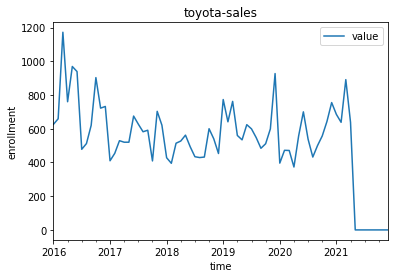

In [168]:
# toyota sales plot
toyota_kaida.groupby("date").sum().plot(title="toyota-sales" , xlabel="time" , ylabel="enrollment")
plt.show()

In [137]:
# only toyota is such a hardtime? 

In [143]:
kaida["value"].rep

0         0
1         1
2         0
3         0
4         1
         ..
321115    0
321116    0
321117    0
321118    1
321119    0
Name: value, Length: 321120, dtype: object